In [110]:
import cv2
import numpy as np
import time

In [111]:
cap = cv2.VideoCapture("FILE PATH")
cap_2 = cv2.VideoCapture("FILE PATH")

In [113]:
HUE_VAL = 35
lower_color = np.array([HUE_VAL-10, 50, 100])
upper_color = np.array([HUE_VAL + 10, 255, 255])

In [114]:
HUE_VAL_STUMPS = 17
lower_color_stumps = np.array([HUE_VAL_STUMPS-7, 100, 100])
upper_color_stumps = np.array([HUE_VAL_STUMPS + 7, 255, 255])

In [115]:
#detects contours on stumps
object_area = 0
top_left_x = 0
top_left_y = 0
top_right_x = 0
top_right_y = 0
bottom_left_x = 0
bottom_left_y = 0
bottom_right_x = 0
bottom_right_y = 0
frame_no = 50
# Set the frame position
cap_2.set(cv2.CAP_PROP_POS_FRAMES, frame_no)

# Read the specific frame
ret, frame = cap_2.read()

if ret:
    # Display the frame
    cv2.imshow('Frame', frame)

    # Save the frame as an image (optional)
    cv2.imwrite('extracted_frame.jpg', frame)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    color_mask = cv2.inRange(hsv, lower_color_stumps, upper_color_stumps)
    contours, _ = cv2.findContours(color_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    image_copy = frame.copy()
    cv2.drawContours(image_copy, contours, -1, (0, 255, 0), thickness = 2)
    cv2.imshow('Contours', image_copy)
    cv2.imshow('Mask', color_mask)
    cv2.imwrite('contours_stumps.jpg', image_copy)
    
    for contour in contours:
        x,y,width,height = cv2.boundingRect(contour)
        found_area = width*height
        #print(x)
        #print(y)
        #print(width)
        #print(height)
        
        if object_area < found_area and found_area > 0:
            object_area = found_area
            top_left_x = x
            top_left_y = y
            top_right_x = top_left_x + width
            top_right_y = y
            bottom_left_x = x
            bottom_left_y = top_left_y + height
            bottom_right_x = bottom_left_x + width
            bottom_right_y = bottom_left_y
    cv2.destroyAllWindows()
cap_2.release()

In [116]:
#detects contours on ball
ball_location_x = []
ball_location_y = []
area = []
frameno = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break  # Break if video has ended
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    color_mask = cv2.inRange(hsv, lower_color, upper_color)
    contours, _ = cv2.findContours(color_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    object_area = 0
    object_x = 0
    object_y = 0
    
    h,width = frame.shape[:2]
    # Loop through contours to detect balls
    for contour in contours:
       x,y,width,height = cv2.boundingRect(contour)
       found_area = width*height
       center_x = x + (width/2)
       center_y = y + (height/2)
       if object_area < found_area:
           object_area = found_area
           object_x = center_x
           object_y = center_y
    if object_area > 0:
        area.append(object_area)
        if(frameno != 0):
            if abs(ball_location_x[frameno - 1] - object_x) < 200 or abs(ball_location_y[frameno - 1] - object_y) < 200:
                ball_location_x.append(object_x)
                ball_location_y.append(h - object_y)
                #print("Hi")
                frameno+=1
        else:
            ball_location_x.append(object_x)
            ball_location_y.append(h - object_y)
            frameno+=1


In [117]:
print(frameno)

81


In [118]:
print(ball_location_x)
print(ball_location_y)
print(area)

[50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 164.0, 282.0, 282.0, 282.0, 282.0, 282.0, 282.0, 282.0, 282.0, 282.0, 282.0, 396.0, 396.0, 397.0, 397.0, 397.0, 397.0, 397.0, 397.0, 397.0, 397.0, 506.0, 506.0, 506.0, 506.0, 506.0, 506.0, 506.0, 506.0, 506.0, 506.0, 608.0, 608.0, 608.0, 608.0, 608.0, 608.0, 608.0, 608.0, 608.0, 608.0, 676.0, 676.0, 676.0, 676.0, 676.0, 676.0, 676.0, 676.0, 676.0, 676.0, 701.5, 701.5, 701.5, 701.5, 701.5, 701.5, 701.5, 701.5, 701.5, 701.5, 697.0, 697.0, 697.0]
[703.0, 702.0, 702.0, 702.0, 702.0, 702.0, 702.0, 702.0, 599.0, 599.0, 599.0, 599.0, 599.0, 599.0, 599.0, 599.0, 599.0, 599.0, 486.0, 486.0, 486.0, 486.0, 486.0, 486.0, 486.0, 486.0, 486.0, 486.0, 359.0, 359.0, 359.0, 359.0, 359.0, 359.0, 359.0, 359.0, 359.0, 359.0, 235.5, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 236.0, 113.0, 113.0, 113.0, 113.0, 113.0, 113.0, 113.0, 113.0, 113.0, 113.0, 211.0, 211.0, 211.0, 211.0, 211.0

In [119]:
print(len(ball_location_x))
print(len(ball_location_y))
print(len(area))

81
81
81


In [120]:
import matplotlib.pyplot as plt

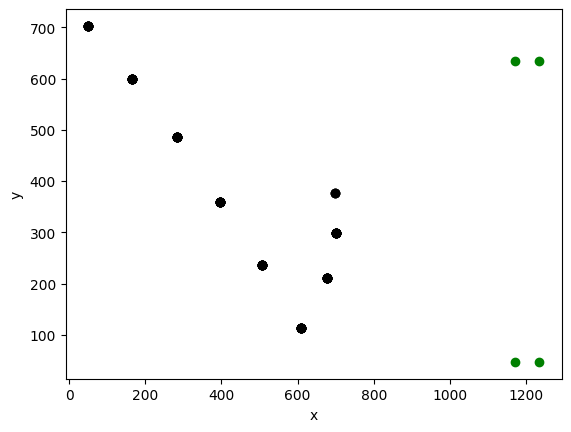

In [121]:
frameno = 0
#plt.subplot(2, 1, 1)
plt.xlabel("x")
plt.ylabel("y")
#fig.subtitle('White evaluation')
for i in ball_location_x:
    plt.plot(i, ball_location_y[frameno], 'o', color = 'black')
    frameno = frameno + 1;
    
plt.plot(top_left_x, top_left_y, 'o', color = 'green')
plt.plot(top_right_x, top_right_y, 'o', color = 'green')
plt.plot(bottom_left_x, bottom_left_y, 'o', color = 'green')
plt.plot(bottom_right_x, bottom_right_y, 'o', color = 'green')
plt.show()

In [122]:
fps = cap.get(cv2.CAP_PROP_FPS)
delta_time = 1/fps
velocity_x = []
velocity_y = []
counter = 0
for i in range(len(ball_location_x)):
    if(counter != 0):
        velocity_x.append((ball_location_x[i] - ball_location_x[i - 1])/delta_time)
        velocity_y.append((ball_location_y[i] - ball_location_y[i - 1])/delta_time)
    counter+=1

In [123]:
print(len(velocity_x))
print(len(velocity_y))
print(len(ball_location_x))
print(len(ball_location_y))

80
80
81
81


In [124]:
print(velocity_x)
print(velocity_y)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3420.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3540.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3420.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3270.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3060.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2040.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 765.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -135.0, 0.0, 0.0]
[-30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3090.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3390.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3810.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3705.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3690.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2940.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2610.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2370.0, 0.0, 0.0]


In [125]:
for i in range(len(velocity_x) - 1, -1, -1):  # Iterate in reverse
    if velocity_x[i] == 0:
        velocity_x.pop(i)
        velocity_y.pop(i)
        ball_location_x.pop(i + 1)
        ball_location_y.pop(i + 1)
print(ball_location_x)
print(ball_location_y)
ball_location_x.pop(len(ball_location_x) - 1)
ball_location_x.pop(len(ball_location_x) - 1)
ball_location_y.pop(len(ball_location_y) - 1)
ball_location_y.pop(len(ball_location_y) - 1)
velocity_x.pop(len(velocity_x) - 1)
velocity_x.pop(len(velocity_x) - 1)
velocity_y.pop(len(velocity_y) - 1)
velocity_y.pop(len(velocity_y) - 1)
#for i in range(len(velocity_x) - 1, -1, -1):  # Iterate in reverse
    #if (abs(velocity_x[i] - velocity_x[i - 1]) > 1500):
        #velocity_x.pop(i)
        #velocity_y.pop(i)
        #ball_location_x.pop(i + 1)
        #ball_location_y.pop(i + 1)
        
#velocity_x = [v for v in velocity_x if v != 0]
#velocity_y = [v for v in velocity_y if v != 0]

[50.0, 164.0, 282.0, 396.0, 397.0, 506.0, 608.0, 676.0, 701.5, 697.0]
[703.0, 599.0, 486.0, 359.0, 359.0, 235.5, 113.0, 211.0, 298.0, 377.0]


2610.0

In [126]:
print(velocity_x)
print(velocity_y)
print(ball_location_x)
print(ball_location_y)

[3420.0, 3540.0, 3420.0, 30.0, 3270.0, 3060.0, 2040.0]
[-3090.0, -3390.0, -3810.0, 0.0, -3705.0, -3690.0, 2940.0]
[50.0, 164.0, 282.0, 396.0, 397.0, 506.0, 608.0, 676.0]
[703.0, 599.0, 486.0, 359.0, 359.0, 235.5, 113.0, 211.0]


In [127]:
print(len(velocity_x))
print(len(velocity_y))
print(len(ball_location_x))
print(len(ball_location_y))

7
7
8
8


In [128]:
print(velocity_x)
print(velocity_y)

[3420.0, 3540.0, 3420.0, 30.0, 3270.0, 3060.0, 2040.0]
[-3090.0, -3390.0, -3810.0, 0.0, -3705.0, -3690.0, 2940.0]


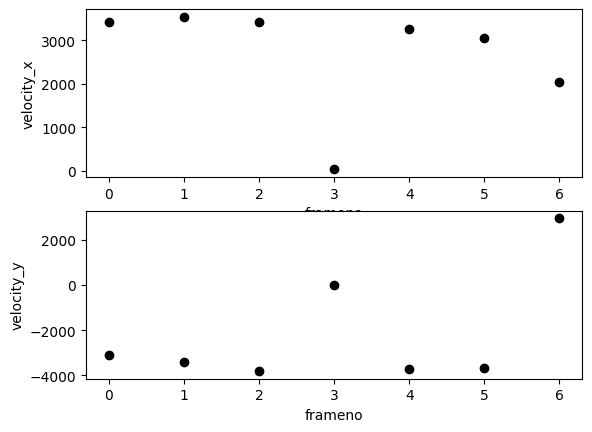

In [129]:
frameno = 0
plt.subplot(2, 1, 1)
plt.xlabel("frameno")
plt.ylabel("velocity_x")
#fig.subtitle('White evaluation')
for i in velocity_x:
    plt.plot(frameno, i, 'o', color = 'black')
    frameno = frameno + 1;
    
frameno = 0
plt.subplot(2, 1, 2)
plt.xlabel("frameno")
plt.ylabel("velocity_y")
#fig.subtitle('White evaluation')
for i in velocity_y:
    plt.plot(frameno, i, 'o', color = 'black')
    frameno = frameno + 1;

In [130]:
counter = -1
for i in range(len(velocity_x)):
    if (velocity_x[i] < 0):
        break
    counter = i
print(counter)

6


In [131]:
print(velocity_x[counter])
print(velocity_y[counter])
print(ball_location_x[counter])
print(ball_location_y[counter])

2040.0
2940.0
608.0
113.0


In [132]:
predicted_position_x = []
predicted_position_y = []
predicted_velocity_y = []
for i in range(counter+1):
    predicted_position_x.append(ball_location_x[i])
    predicted_position_y.append(ball_location_y[i])
    predicted_velocity_y.append(velocity_y[i])

predicted_position_x.append(ball_location_x[counter +1])
predicted_position_y.append(ball_location_y[counter+1])
print(predicted_position_x)
print(predicted_position_y)
print(predicted_velocity_y)
heightWickets = bottom_right_y - top_right_y
print(heightWickets)
PixelsPerMeter = heightWickets/0.7112
acceleration = 9.8 * PixelsPerMeter
print(predicted_velocity_y[-1])
print(top_right_x)
while(predicted_position_x[-1] <= top_right_x):
    #print(predicted_position_x[-1])
    predicted_position_x.append(predicted_position_x[-1] + velocity_x[counter]*delta_time)
    #print(predicted_position_x[-1])
    predicted_velocity_y.append(predicted_velocity_y[-1] + (-1*acceleration)*delta_time)
    predicted_position_y.append(predicted_position_y[-1] + predicted_velocity_y[-1]*delta_time)
    
    #remove this line if the ball would bounce after hitting the batsman's pads
    if (predicted_position_y[-1] < 0):
        break

[50.0, 164.0, 282.0, 396.0, 397.0, 506.0, 608.0, 676.0]
[703.0, 599.0, 486.0, 359.0, 359.0, 235.5, 113.0, 211.0]
[-3090.0, -3390.0, -3810.0, 0.0, -3705.0, -3690.0, 2940.0]
587
2940.0
1234


In [133]:
print(predicted_position_x)
print(predicted_position_y)
print(len(predicted_position_x))
print(len(predicted_position_y))

[50.0, 164.0, 282.0, 396.0, 397.0, 506.0, 608.0, 676.0, 744.0, 812.0, 880.0, 948.0, 1016.0, 1084.0, 1152.0, 1220.0, 1288.0]
[703.0, 599.0, 486.0, 359.0, 359.0, 235.5, 113.0, 211.0, 300.0126859142607, 380.03805774278214, 451.0761154855643, 513.1268591426071, 566.1902887139107, 610.266404199475, 645.3552055993, 671.4566929133857, 688.5708661417323]
17
17


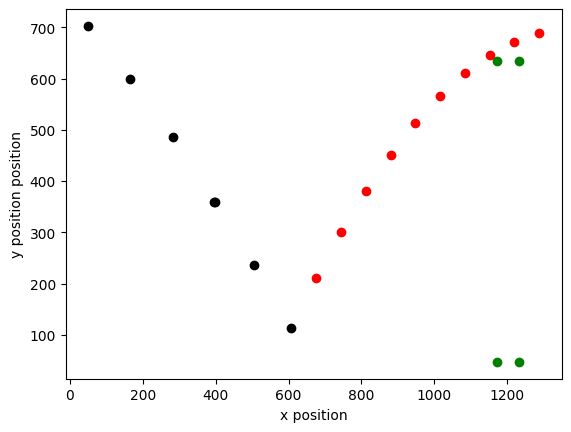

In [ ]:
#plt.subplot(2, 1, 1)
plt.xlabel("x position")
plt.ylabel("y position position")
#fig.subtitle('White evaluation')
for i in range(len(predicted_position_x)):
    if (i <= counter +1):
        plt.plot(predicted_position_x[i], predicted_position_y[i], 'o', color = 'black')
    else:
        plt.plot(predicted_position_x[i], predicted_position_y[i], 'o', color = 'red')
plt.plot(top_left_x, top_left_y, 'o', color = 'green')
plt.plot(top_right_x, top_right_y, 'o', color = 'green')
plt.plot(bottom_left_x, bottom_left_y, 'o', color = 'green')
plt.plot(bottom_right_x, bottom_right_y, 'o', color = 'green')


In [135]:
print(top_left_x)
print(bottom_right_x)

1172
1234


In [136]:
wickets = False
for i in range(len(predicted_position_x)):
    if (predicted_position_x[i] >= top_left_x and predicted_position_y[i] >= top_left_y):
        if (predicted_position_y[i] <= bottom_left_y):
            wickets = True

if (wickets == True):
    print("Wickets Hitting")
else:
    print("Wickets Missing")

Wickets Missing
